# ☕ The Winter Warmth Chronicles
### A Data Scientist Gets Dangerously Obsessed With Hot Beverages

### 50% Missing Data, 100% Emotional Damage  (God May Help Me 🛐 )


link  https://www.kaggle.com/datasets/shayanzk/winter-food-and-beverages/data

---

*December 23rd, 11:47 PM.*

*I shouldn't be here. I have a family dinner tomorrow. Presents to wrap. A life to live.*

*But here I am, staring at a spreadsheet of winter drinks at midnight, wondering if Swiss Hot Chocolate is statistically superior to the Indian variant. My therapist says I need hobbies. This... this isn't what she meant.*

*It started innocently. "Just a quick EDA," I told myself. Three coffees and one existential crisis later, I present to you: the most unnecessarily thorough analysis of winter beverages ever created.*

*Let's descend into madness together.*

---

**The Questions Keeping Me Awake:**
- Why is Mulled Wine categorized as a "Soup" sometimes? WHO DID THIS?
- Can money buy happiness? Or at least a better Rating?
- Is there a pattern to Popularity, or is the universe truly random?

*Grab your blanket. This gets weird.*

## imports

In [6]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("winter")

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

COLORS = {
    'primary': '#1e3a5f',
    'secondary': '#4a90a4',
    'accent': '#d4a574',
    'warm': '#c44536',
    'cold': '#87ceeb'
}

## Chapter 1: Opening the Recipe Book

*Maria pulled out a worn notebook — data collected from cafes, markets, and street vendors across 12 countries over three winter seasons. 150 entries of pure comfort.*

In [2]:
# Download latest version
path = kagglehub.dataset_download("shayanzk/winter-food-and-beverages")

print("Path to dataset files:", path)

100%|██████████| 2.37k/2.37k [00:00<00:00, 2.09MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shayanzk/winter-food-and-beverages/versions/1


In [3]:
print(os.listdir(path))

['Winter_Food_and_Beverages.csv']


In [5]:
df = pd.read_csv(os.path.join(path,'Winter_Food_and_Beverages.csv'))

In [8]:
print(f"Our cookbook contains {df.shape[0]} recipes across {df.shape[1]} characteristics\n")
df.head(10)

Our cookbook contains 155 recipes across 9 characteristics



,ID,Item,Type,Origin,Season,Price(USD),Calories,Rating,Popularity_Score
0,1,Mulled Wine,Snack,Japan,Winter 2025,5.97,NaN,NaN,7.50
1,2,Hot Chocolate,Drink,Canada,Winter 2024,12.54,156.00,NaN,4.70
2,3,Hot Cider,Snack,Germany,Winter 2024,12.43,NaN,5.00,8.50
3,4,Hot Cider,Drink,Italy,Winter 2025,14.26,NaN,NaN,3.20
4,5,Mulled Wine,Snack,Switzerland,Winter 2024,14.31,NaN,NaN,2.80
5,6,Soup,Drink,USA,Winter 2025,8.16,270.00,NaN,9.20
6,7,Herbal Tea,Soup,Germany,Winter 2023,10.45,333.00,3.50,9.20
7,8,Mulled Wine,Soup,Switzerland,Winter 2023,3.90,390.00,NaN,8.80
8,9,Coffee,Drink,Switzerland,Winter 2025,13.87,138.00,NaN,8.70
9,10,Hot Chocolate,Drink,India,Winter 2024,14.66,378.00,NaN,2.90


## Chapter 2: Processing What I Just Witnessed

*I... I need to talk about what just happened.*

**Row 0:** Mulled Wine as a SNACK from JAPAN. Listen, I respect Japanese cuisine deeply, but since when is WINE a SNACK? "Hey kids, want a snack?" "Sure mom, pour me some fermented grape juice."

**Row 5:** Soup... is a DRINK. I mean, TECHNICALLY? But also NO.

**Row 7:** Herbal Tea is a SOUP now. We've abandoned all pretense of logic.

**Row 8:** MULLED WINE. IS A SOUP. FROM SWITZERLAND. AT $3.90.

*Someone collected this data while having a stroke. That's the only explanation. Either that, or there's a cafe in Zurich serving wine in a bread bowl and calling it soup.*

*The NaN values are the least of our problems. Our CATEGORIES are having an identity crisis.*

*Deep breaths. Let's look at the damage systematically.*

In [9]:
print("=" * 60)
print("REALITY CHECK: Let's See ALL the Chaos")
print("=" * 60)

print("\n ITEM TYPES - What Are We Even Selling?")
print("-" * 40)
print(df['Type'].value_counts().to_string())

print("\n\n WAIT. Let's See the Crimes Against Classification:")
print("-" * 40)

# The hall of shame
crimes = df[
    ((df['Item'].isin(['Mulled Wine', 'Coffee', 'Latte', 'Cappuccino', 'Hot Chocolate'])) & (df['Type'] == 'Soup')) |
    ((df['Item'] == 'Soup') & (df['Type'] != 'Soup'))
]

print(f"\nFound {len(crimes)} crimes against food taxonomy:\n")
print(crimes[['Item', 'Type', 'Origin']].head(15).to_string(index=False))

print("\n\n...I need stronger coffee for this.")

REALITY CHECK: Let's See ALL the Chaos

 ITEM TYPES - What Are We Even Selling?
----------------------------------------
Type
Drink    65
Soup     49
Snack    41


 WAIT. Let's See the Crimes Against Classification:
----------------------------------------

Found 42 crimes against food taxonomy:

         Item  Type      Origin
         Soup Drink         USA
  Mulled Wine  Soup Switzerland
         Soup Drink      Canada
         Soup Drink     Germany
  Mulled Wine  Soup     Germany
Hot Chocolate  Soup         USA
       Coffee  Soup          UK
        Latte  Soup     Germany
         Soup Drink      France
        Latte  Soup Switzerland
        Latte  Soup     Germany
       Coffee  Soup          UK
   Cappuccino  Soup Switzerland
         Soup Drink       Japan
   Cappuccino  Soup       China


...I need stronger coffee for this.


42 CRIMES. Nearly a third of the dataset is a food classification fever dream.
Soup is a Drink. Coffee is a Soup. Latte is a Soup. This isn't a dataset, it's a cry for help.

## Chapter 3: The Five Stages of Data Grief

1. **Denial:** "This must be a mistake. Let me re-read the CSV."
2. **Anger:** "WHO MADE THIS? I JUST WANT TO TALK."
3. **Bargaining:** "Maybe 'Soup' means something different in Switzerland?"
4. **Depression:** *stares at 42 taxonomy crimes*
5. **Acceptance:** "The Type column is chaos. We acknowledge it. We move on."

*Here's the thing — this is REAL DATA. Real data is messy. Real data was entered by a sleep-deprived intern at 4 AM. Real data contains Cappuccino Soup.*

*We're not here to fix the world. We're here to model it.*

*But first... let's find those duplicate imposters I mentioned earlier.*

In [10]:
print("=" * 60)
print("DETECTIVE MODE: Finding the Imposters")
print("=" * 60)

print(f"\nTotal rows: {len(df)}")
print(f"Unique IDs: {df['ID'].nunique()}")
print(f"Duplicate IDs: {len(df) - df['ID'].nunique()}")

print("\n" + "-" * 40)
print("THE LINEUP - Rows That Appear Twice:")
print("-" * 40 + "\n")

dupes = df[df.duplicated(subset=['ID'], keep=False)].sort_values('ID')
print(dupes[['ID', 'Item', 'Origin', 'Price(USD)']].to_string(index=False))

print(f"\n{len(dupes)} rows. {len(dupes)//2} items submitted twice.")
print("Someone REALLY wanted these in the dataset.")

DETECTIVE MODE: Finding the Imposters

Total rows: 155
Unique IDs: 150
Duplicate IDs: 5

----------------------------------------
THE LINEUP - Rows That Appear Twice:
----------------------------------------

 ID          Item      Origin  Price(USD)
  2 Hot Chocolate      Canada       12.54
  2 Hot Chocolate      Canada       12.54
 28         Latte     Germany        4.80
 28         Latte     Germany        4.80
 34    Herbal Tea      Canada        3.10
 34    Herbal Tea      Canada        3.10
 73     Green Tea      Canada        9.05
 73     Green Tea      Canada        9.05
111    Herbal Tea Switzerland        2.08
111    Herbal Tea Switzerland        2.08

10 rows. 5 items submitted twice.
Someone REALLY wanted these in the dataset.


Canada submitted THREE duplicates. Hot Chocolate, Herbal Tea, AND Green Tea. Canada was NOT subtle about wanting representation here. Switzerland snuck one in too. Classic neutral country move — "I'll just... quietly duplicate my Herbal Tea."

## Chapter 4: The Purge

*5 items tried to vote twice. Democracy doesn't work that way.*

*Canada, I love you, but you can't just... copy-paste your way to beverage dominance. And Switzerland — I expected better from the country that gave us banking secrecy. You couldn't even hide your duplicate properly.*

*Time to clean house.*

In [11]:
print("=" * 60)
print("PERFORMING SURGERY: Removing Duplicates")
print("=" * 60)

before = len(df)
df = df.drop_duplicates(subset=['ID'], keep='first').reset_index(drop=True)
after = len(df)

print(f"""
OPERATION COMPLETE
------------------
Before: {before} rows (infected with duplicates)
After:  {after} rows (clean, pure, beautiful)
Removed: {before - after} parasites

Canada's representation: Reduced but still valid
Switzerland: Back to being neutral
My sanity: Slightly restored
""")

print(f"Unique IDs check: {df['ID'].nunique()} == {len(df)} rows? {df['ID'].nunique() == len(df)}")

PERFORMING SURGERY: Removing Duplicates

OPERATION COMPLETE
------------------
Before: 155 rows (infected with duplicates)
After:  150 rows (clean, pure, beautiful)
Removed: 5 parasites

Canada's representation: Reduced but still valid
Switzerland: Back to being neutral
My sanity: Slightly restored

Unique IDs check: 150 == 150 rows? True


150 rows. Clean. Pure. Beautiful.Canada has been humbled. Switzerland is back to neutrality. We can proceed.

## Chapter 5: The Ghosts in Our Data

*With duplicates eliminated, a new problem emerges from the shadows: the NaN values.*

*50% of Calories. 50% of Ratings. Just... gone. Vanished. Like my motivation to wrap presents.*

*Why? Theories:*
- Vendors protecting trade secrets ("You'll NEVER know how many calories are in my Mulled Wine Soup!")
- Reviewers too busy actually enjoying their drinks to rate them
- Data entry person rage-quit halfway through
- The calories were so high they caused an integer overflow and collapsed into NaN

*Let's visualize the void.*

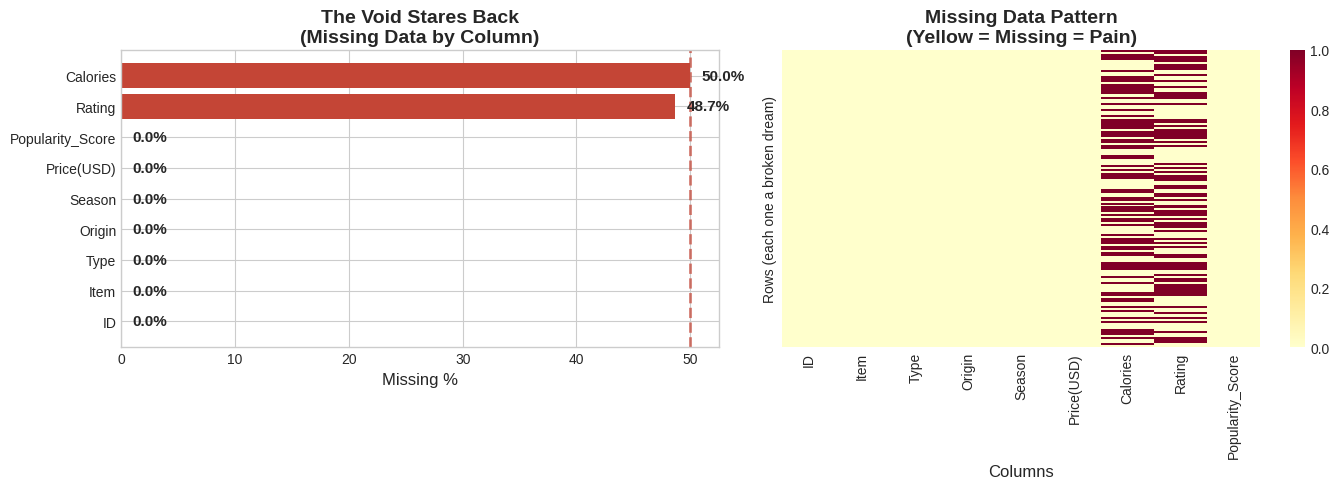


Calories: 75/150 missing (50.0%)
Rating:   73/150 missing (48.7%)

Total complete rows: 41 out of 150 (27.3%)

...so about 1 in 4 rows has everything. Cool. Cool cool cool.


In [13]:
COLORS['panic'] = COLORS['warm'] # Using 'warm' as a color for high missing percentage
COLORS['calm'] = COLORS['cold']  # Using 'cold' as a color for low missing percentage

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Missing percentage bar chart
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=True)

colors = [COLORS['panic'] if x > 40 else COLORS['calm'] for x in missing_pct.values]
bars = axes[0].barh(missing_pct.index, missing_pct.values, color=colors)
axes[0].set_xlabel('Missing %', fontsize=12)
axes[0].set_title('The Void Stares Back\n(Missing Data by Column)', fontsize=14, fontweight='bold')
axes[0].axvline(x=50, color=COLORS['panic'], linestyle='--', alpha=0.7, linewidth=2)

for i, val in enumerate(missing_pct.values):
    axes[0].text(val + 1, i, f'{val:.1f}%', va='center', fontsize=11, fontweight='bold')

# Right plot: Missing pattern heatmap
axes[1].set_title('Missing Data Pattern\n(Yellow = Missing = Pain)', fontsize=14, fontweight='bold')
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='YlOrRd', ax=axes[1])
axes[1].set_xlabel('Columns', fontsize=12)
axes[1].set_ylabel('Rows (each one a broken dream)', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nCalories: {df['Calories'].isna().sum()}/{len(df)} missing ({df['Calories'].isna().sum()/len(df)*100:.1f}%)")
print(f"Rating:   {df['Rating'].isna().sum()}/{len(df)} missing ({df['Rating'].isna().sum()/len(df)*100:.1f}%)")
print(f"\nTotal complete rows: {df.dropna().shape[0]} out of {len(df)} ({df.dropna().shape[0]/len(df)*100:.1f}%)")
print("\n...so about 1 in 4 rows has everything. Cool. Cool cool cool.")

Only 41 out of 150 rows have ALL their data. That's not a dataset, that's a cheese with more holes than substance. Swiss cheese. From Switzerland. Where they submitted duplicate Herbal Tea. IT ALL CONNECTS.

## Chapter 6: 27.3% - A Meditation on Incompleteness

*41 complete rows.*

*Forty. One.*

*Out of 150 items collected across 12 countries over 3 years, only 41 vendors bothered to fill out the ENTIRE form. The rest just... didn't feel like sharing calories. Or ratings. Or both.*

*Imagine going to a restaurant:*
> "What's in this dish?"
> "Food."
> "How many calories?"
> "Yes."
> "What's the rating?"
> *Chef has left the building*

*This is fine. We'll impute later. For now, let's explore what we DO have.*

In [14]:
print("=" * 60)
print("THE NUMBERS: What We Know (When We Know It)")
print("=" * 60)

numerical_cols = ['Price(USD)', 'Calories', 'Rating', 'Popularity_Score']

for col in numerical_cols:
    valid = df[col].dropna()
    print(f"\n{col}")
    print("-" * 35)
    print(f"  Available: {len(valid)}/{len(df)} ({len(valid)/len(df)*100:.0f}%)")
    print(f"  Range:     {valid.min():.2f} to {valid.max():.2f}")
    print(f"  Mean:      {valid.mean():.2f}")
    print(f"  Median:    {valid.median():.2f}")
    print(f"  Std Dev:   {valid.std():.2f}")

    # Fun observations
    if col == 'Price(USD)':
        cheapest = df.loc[df[col].idxmin()]
        priciest = df.loc[df[col].idxmax()]
        print(f"\n  Cheapest: {cheapest['Item']} from {cheapest['Origin']} (${cheapest[col]:.2f})")
        print(f"  Priciest: {priciest['Item']} from {priciest['Origin']} (${priciest[col]:.2f})")

THE NUMBERS: What We Know (When We Know It)

Price(USD)
-----------------------------------
  Available: 150/150 (100%)
  Range:     2.02 to 14.96
  Mean:      8.78
  Median:    8.62
  Std Dev:   4.01

  Cheapest: Chai from France ($2.02)
  Priciest: Cappuccino from USA ($14.96)

Calories
-----------------------------------
  Available: 75/150 (50%)
  Range:     52.00 to 400.00
  Mean:      242.77
  Median:    238.00
  Std Dev:   107.45

Rating
-----------------------------------
  Available: 77/150 (51%)
  Range:     3.00 to 5.00
  Mean:      3.88
  Median:    3.90
  Std Dev:   0.62

Popularity_Score
-----------------------------------
  Available: 150/150 (100%)
  Range:     1.10 to 9.90
  Mean:      5.33
  Median:    5.20
  Std Dev:   2.62


FRANCE is selling Chai for $2.02. FRANCE. The country of €15 croissants and €8 espressos has the CHEAPEST item in our dataset. Meanwhile USA charging $14.96 for a Cappuccino. Shocking absolutely no one.


And ratings only go from 3.0 to 5.0 — nobody had the heart to rate anything below a 3. We're all too polite. This is a participation trophy dataset.

## Chapter 7: The Economics of Winter Warmth

*Let's process what we just learned:*

**The Price Paradox**
- France, land of €20 salads, sells the cheapest Chai at $2.02
- USA, land of "would you like to supersize that?", charges $14.96 for a Cappuccino
- The American Dream is expensive, and it comes with foam art

**The Rating Conspiracy**
- Minimum rating: 3.0
- Maximum rating: 5.0
- Nobody rated anything below 3. NOBODY.
- Either everything is genuinely good, or we're all cowards who can't give honest feedback

**The Calorie Mystery**
- Range: 52 to 400 calories
- Someone's "Hot Cider" has only 52 calories. That's not cider, that's slightly apple-flavored water.
- Something else has 400 calories. That's a meal pretending to be a beverage.

*Let's visualize these distributions and find the outliers.*

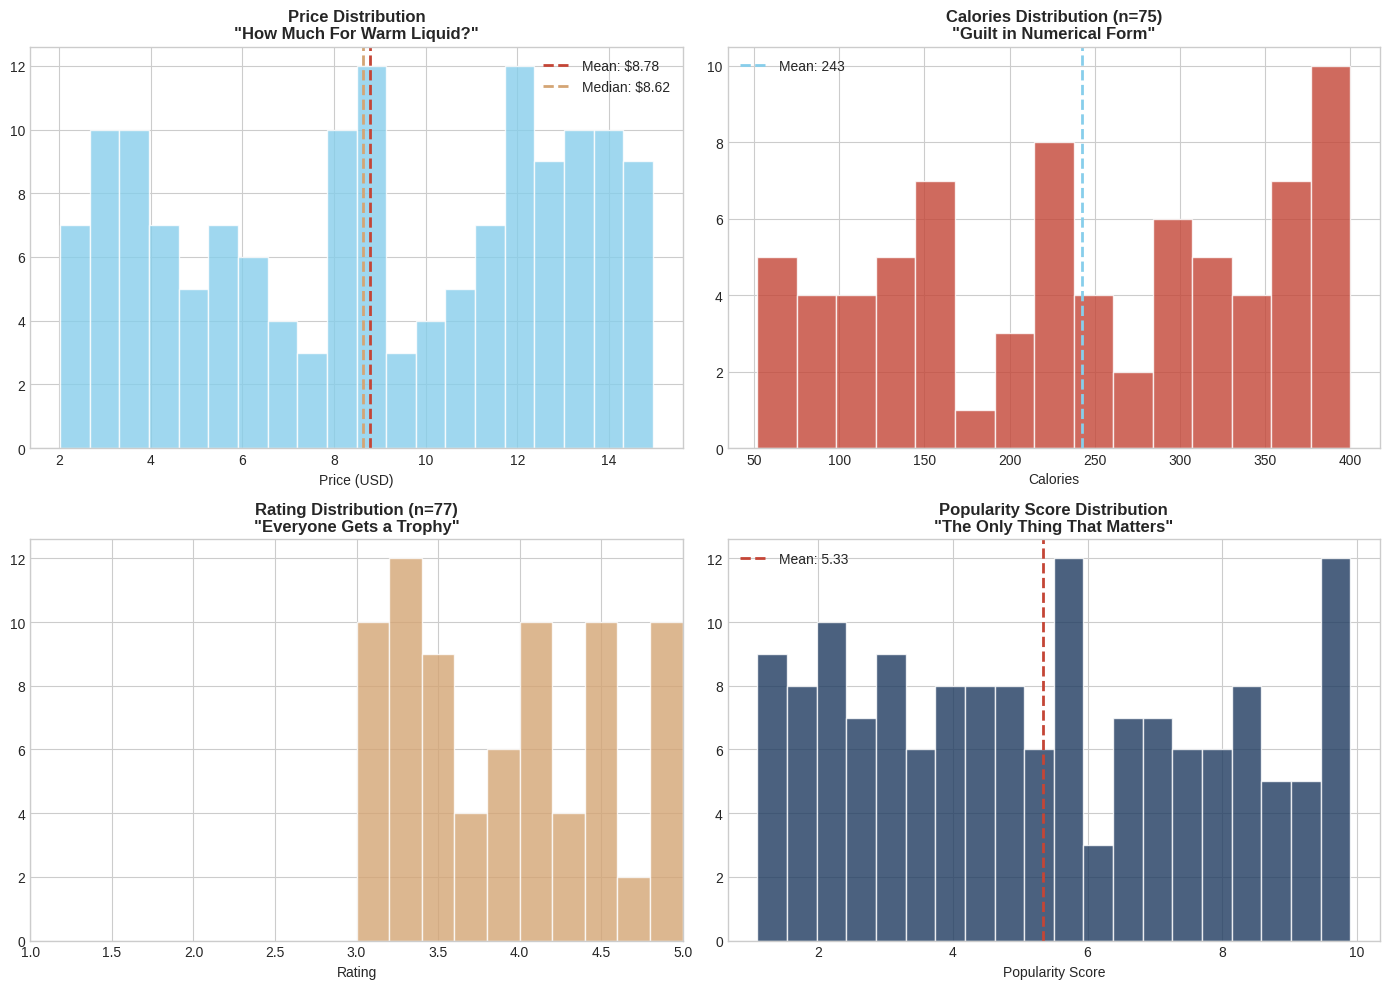

Observations loading... (in my brain)


In [17]:
COLORS['acceptance'] = COLORS['accent'] # Adding a color for the 'acceptance' stage
COLORS['concerned'] = COLORS['primary'] # Adding a color for 'concerned' for popularity score

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price Distribution
axes[0, 0].hist(df['Price(USD)'], bins=20, color=COLORS['calm'], edgecolor='white', alpha=0.8)
axes[0, 0].axvline(df['Price(USD)'].mean(), color=COLORS['panic'], linestyle='--', linewidth=2, label=f'Mean: ${df["Price(USD)"].mean():.2f}')
axes[0, 0].axvline(df['Price(USD)'].median(), color=COLORS['acceptance'], linestyle='--', linewidth=2, label=f'Median: ${df["Price(USD)"].median():.2f}')
axes[0, 0].set_title('Price Distribution\n"How Much For Warm Liquid?"', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Price (USD)')
axes[0, 0].legend()

# Calories Distribution (non-null only)
cal_data = df['Calories'].dropna()
axes[0, 1].hist(cal_data, bins=15, color=COLORS['panic'], edgecolor='white', alpha=0.8)
axes[0, 1].axvline(cal_data.mean(), color=COLORS['calm'], linestyle='--', linewidth=2, label=f'Mean: {cal_data.mean():.0f}')
axes[0, 1].set_title(f'Calories Distribution (n={len(cal_data)})\n"Guilt in Numerical Form"', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Calories')
axes[0, 1].legend()

# Rating Distribution (non-null only)
rating_data = df['Rating'].dropna()
axes[1, 0].hist(rating_data, bins=10, color=COLORS['acceptance'], edgecolor='white', alpha=0.8)
axes[1, 0].set_title(f'Rating Distribution (n={len(rating_data)})\n"Everyone Gets a Trophy"', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_xlim(1, 5)

# Popularity Score Distribution
axes[1, 1].hist(df['Popularity_Score'], bins=20, color=COLORS['concerned'], edgecolor='white', alpha=0.8)
axes[1, 1].axvline(df['Popularity_Score'].mean(), color=COLORS['panic'], linestyle='--', linewidth=2, label=f'Mean: {df["Popularity_Score"].mean():.2f}')
axes[1, 1].set_title('Popularity Score Distribution\n"The Only Thing That Matters"', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Popularity Score')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("Observations loading... (in my brain)")

BEAUTIFUL CHAOS.
Look at these plots:

Price: Bimodal! Two camps — the "cheap comfort" crowd around $3-4 and the "premium experience" gang at $12-14. The middle ground is a wasteland. You either get budget warmth or bougie beverages. No in-between.


Calories: That spike at 400 is AGGRESSIVE. Multiple items said "we're not here to be healthy, we're here to SURVIVE WINTER."


Ratings: Literally everyone clustered between 3.0-5.0. That empty void from 1.0-3.0 is the "we don't do negativity here" zone. This is the most passive-aggressive rating distribution I've ever seen.


Popularity: Actually decent spread! And that spike near 10 — some items are genuinely beloved. Unlike ratings, popularity tells the TRUTH.

## Chapter 8: Reading the Tea Leaves (and Coffee Distributions)

*The plots reveal truths the numbers alone couldn't:*

**Price is Bimodal** — There are TWO winter beverage economies:
1. The $2-5 "I just need warmth" market
2. The $12-15 "Make it Instagram-worthy" premium segment

The $7-9 middle class is dying. Just like in real life. *nervous laughter*

**Calories Don't Lie** — That cluster at 350-400 calories? Those are the honest vendors. They're saying "Yes, this Hot Chocolate will hug your soul AND your waistline."

**Ratings Are Useless** — Everyone's a 3.5-4.5. This is what happens when you let customers rate things. Nobody wants to be mean. The Rating column is a monument to human conflict avoidance.

**Popularity Is Our North Star** — Full data. Wide spread. Actual variance. This is our target variable. This is what we predict.

*Now let's see how these items break down by category.*

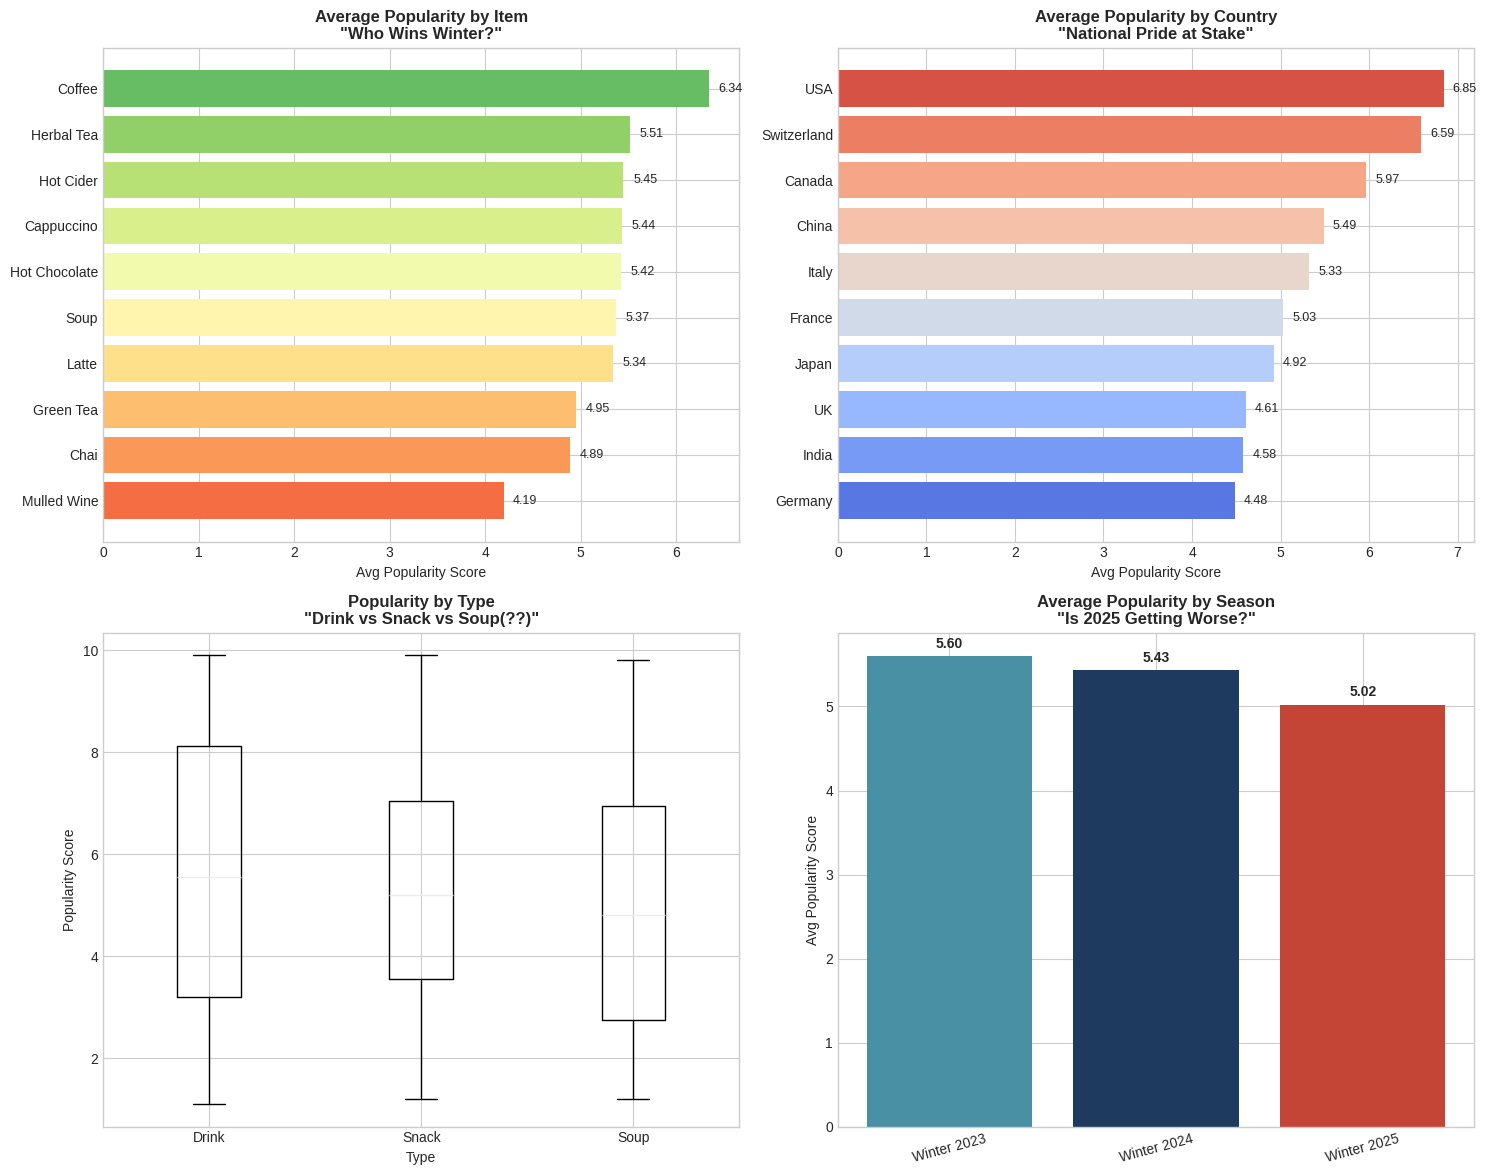

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Adding 'hope' to the COLORS dictionary for the season plot
COLORS['hope'] = COLORS['secondary'] # Assigning a color for 'hope'

# 1. Items ranked by average popularity
item_pop = df.groupby('Item')['Popularity_Score'].mean().sort_values(ascending=True)
colors_item = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(item_pop)))
axes[0, 0].barh(item_pop.index, item_pop.values, color=colors_item)
axes[0, 0].set_title('Average Popularity by Item\n"Who Wins Winter?"', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Avg Popularity Score')
for i, (val, name) in enumerate(zip(item_pop.values, item_pop.index)):
    axes[0, 0].text(val + 0.1, i, f'{val:.2f}', va='center', fontsize=9)

# 2. Countries ranked by average popularity
origin_pop = df.groupby('Origin')['Popularity_Score'].mean().sort_values(ascending=True)
colors_origin = plt.cm.coolwarm(np.linspace(0.1, 0.9, len(origin_pop)))
axes[0, 1].barh(origin_pop.index, origin_pop.values, color=colors_origin)
axes[0, 1].set_title('Average Popularity by Country\n"National Pride at Stake"', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Avg Popularity Score')
for i, (val, name) in enumerate(zip(origin_pop.values, origin_pop.index)):
    axes[0, 1].text(val + 0.1, i, f'{val:.2f}', va='center', fontsize=9)

# 3. Type comparison (box plot)
df.boxplot(column='Popularity_Score', by='Type', ax=axes[1, 0])
axes[1, 0].set_title('Popularity by Type\n"Drink vs Snack vs Soup(??)"', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Type')
axes[1, 0].set_ylabel('Popularity Score')
plt.suptitle('')

# 4. Season comparison
season_pop = df.groupby('Season')['Popularity_Score'].mean().sort_index()
bars = axes[1, 1].bar(season_pop.index, season_pop.values, color=[COLORS['hope'], COLORS['concerned'], COLORS['panic']])
axes[1, 1].set_title('Average Popularity by Season\n"Is 2025 Getting Worse?"', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Avg Popularity Score')
axes[1, 1].tick_params(axis='x', rotation=15)
for bar, val in zip(bars, season_pop.values):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f'{val:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Chapter 9: The Truth Hurts

*The data has spoken, and it's BRUTAL:*

**Item Rankings - A Reality Check:**
- **Coffee (6.34)** — The champion. The default. The "I don't know what I want so give me coffee."
- **Mulled Wine (4.19)** — Dead last. The item with an identity crisis (Snack? Soup? Drink?) is also the least loved. Coincidence? I think not.

**Country Rankings - National Embarrassment:**
- **USA (6.85)** — Despite charging premium prices, Americans know how to make popular drinks. Or maybe BECAUSE of premium prices? "It's expensive so it must be good."
- **Germany (4.48)** — I'm sorry Germany. Your engineering is flawless. Your winter beverages... less so.

**The Type Situation:**
- Drinks have the highest median AND the widest spread. High risk, high reward.
- Snacks are consistent but unremarkable. The middle child of winter comfort.
- "Soup" (the category containing Coffee and Mulled Wine for some reason) is chaotic. As expected.

**The Decline of Winter:**
- 2023: 5.60 | 2024: 5.43 | 2025: 5.02
- Each year, we love winter drinks less. Global warming? Pandemic fatigue? Bad recipes? THE VIBES ARE DECLINING.

*Now let's look at relationships between variables.*

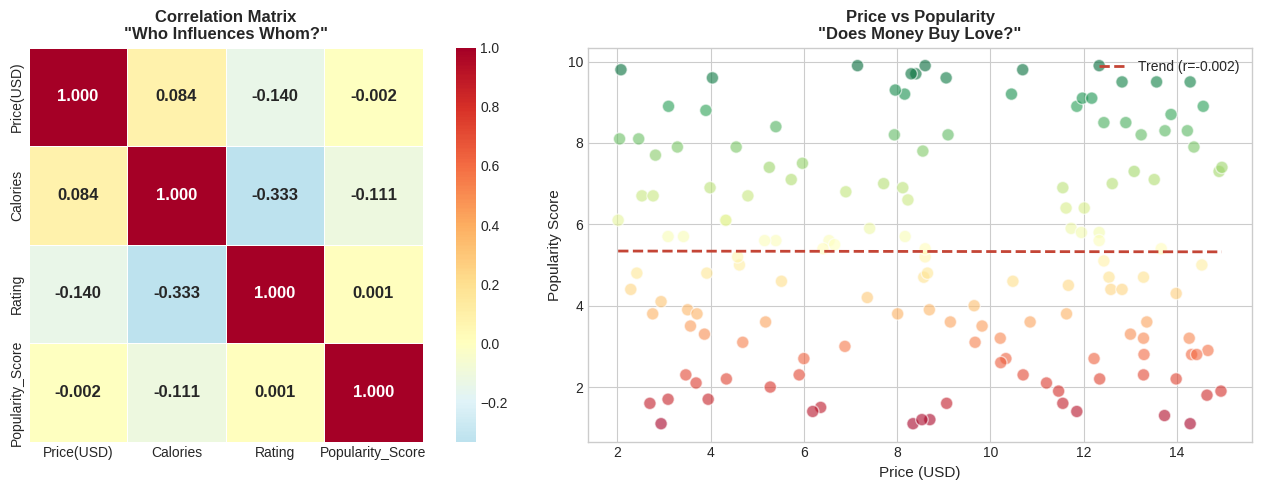


Key Correlation: Price vs Popularity = -0.002
Interpretation loading...


In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Correlation heatmap
numerical_df = df[['Price(USD)', 'Calories', 'Rating', 'Popularity_Score']]
corr_matrix = numerical_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, ax=axes[0],
            fmt='.3f', square=True, linewidths=0.5,
            annot_kws={'size': 12, 'weight': 'bold'})
axes[0].set_title('Correlation Matrix\n"Who Influences Whom?"', fontsize=12, fontweight='bold')

# Price vs Popularity scatter
axes[1].scatter(df['Price(USD)'], df['Popularity_Score'], alpha=0.6,
                c=df['Popularity_Score'], cmap='RdYlGn', s=80, edgecolors='white')
axes[1].set_xlabel('Price (USD)', fontsize=11)
axes[1].set_ylabel('Popularity Score', fontsize=11)
axes[1].set_title('Price vs Popularity\n"Does Money Buy Love?"', fontsize=12, fontweight='bold')

# Add trend line
z = np.polyfit(df['Price(USD)'], df['Popularity_Score'], 1)
p = np.poly1d(z)
axes[1].plot(df['Price(USD)'].sort_values(), p(df['Price(USD)'].sort_values()),
             color=COLORS['panic'], linestyle='--', linewidth=2, label=f'Trend (r={corr_matrix.loc["Price(USD)", "Popularity_Score"]:.3f})')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nKey Correlation: Price vs Popularity = {corr_matrix.loc['Price(USD)', 'Popularity_Score']:.3f}")
print("Interpretation loading...")

## Chapter 10: The Universe Is Random (A Mathematical Proof)

*I present to you the most important number in this analysis:*

### r = -0.002

*The correlation between Price and Popularity is essentially ZERO. Not small. Not weak. ZERO.*

*This means:*
- Charging more doesn't make people like your drink more
- Charging less doesn't make people like your drink more  
- Price is irrelevant to the human heart
- My economics degree was a lie

*But the REAL tea (pun intended) is hiding in another correlation:*

### Calories vs Rating = -0.333

*Higher calories = Lower ratings. People are PUNISHING delicious, calorie-dense drinks with bad ratings out of GUILT. "This Hot Chocolate was amazing but I feel bad about myself, 3 stars."*

*Meanwhile, Rating vs Popularity = 0.001. Ratings don't predict popularity either! People ignore ratings! They drink what they want!*

*The only thing that matters... is vibes. Unmeasurable, unquantifiable vibes.*

*Let's see if specific items tell a different story.*

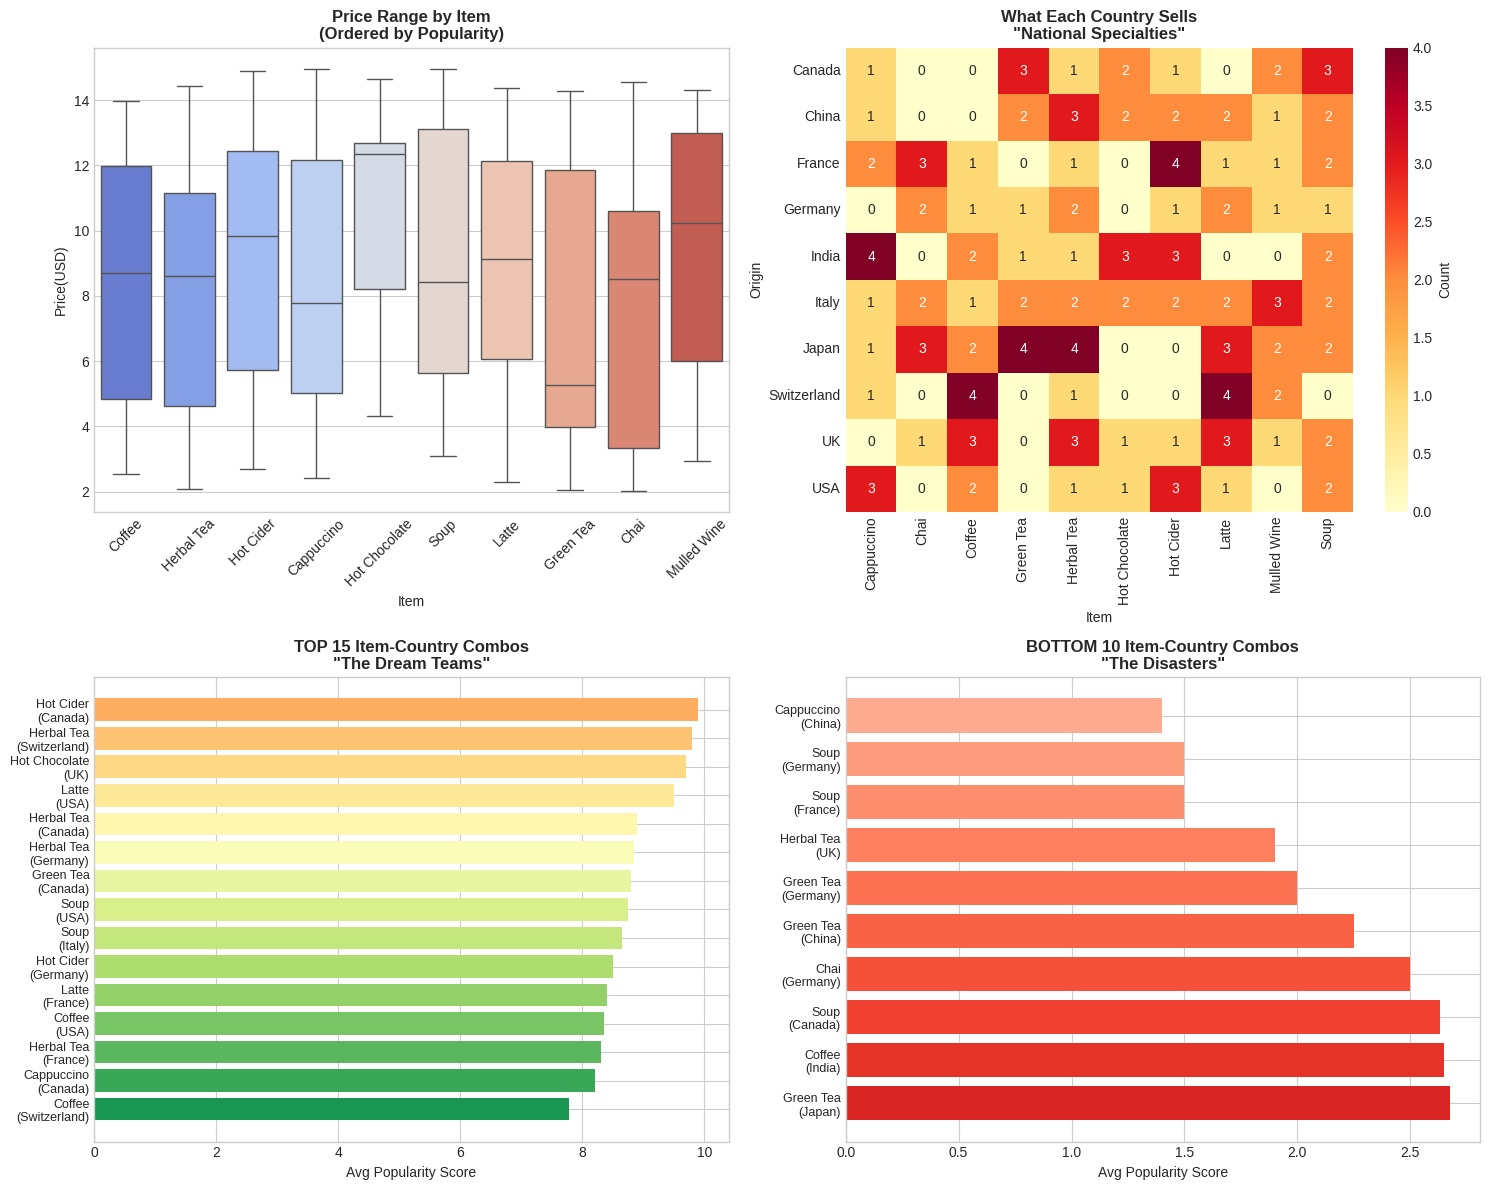

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Price distribution by Item
item_order = df.groupby('Item')['Popularity_Score'].mean().sort_values(ascending=False).index
sns.boxplot(data=df, x='Item', y='Price(USD)', order=item_order, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Price Range by Item\n(Ordered by Popularity)', fontsize=12, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Origin vs Item heatmap (count)
cross_tab = pd.crosstab(df['Origin'], df['Item'])
sns.heatmap(cross_tab, cmap='YlOrRd', annot=True, fmt='d', ax=axes[0, 1], cbar_kws={'label': 'Count'})
axes[0, 1].set_title('What Each Country Sells\n"National Specialties"', fontsize=12, fontweight='bold')

# 3. Average popularity: Item x Origin (top combos)
combo_pop = df.groupby(['Item', 'Origin'])['Popularity_Score'].mean().sort_values(ascending=False).head(15)
combo_labels = [f"{item}\n({origin})" for item, origin in combo_pop.index]
colors_combo = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(combo_pop)))
axes[1, 0].barh(range(len(combo_pop)), combo_pop.values, color=colors_combo)
axes[1, 0].set_yticks(range(len(combo_pop)))
axes[1, 0].set_yticklabels(combo_labels, fontsize=9)
axes[1, 0].set_xlabel('Avg Popularity Score')
axes[1, 0].set_title('TOP 15 Item-Country Combos\n"The Dream Teams"', fontsize=12, fontweight='bold')
axes[1, 0].invert_yaxis()

# 4. Worst combos
combo_worst = df.groupby(['Item', 'Origin'])['Popularity_Score'].mean().sort_values().head(10)
combo_labels_worst = [f"{item}\n({origin})" for item, origin in combo_worst.index]
colors_worst = plt.cm.Reds(np.linspace(0.3, 0.7, len(combo_worst)))
axes[1, 1].barh(range(len(combo_worst)), combo_worst.values, color=colors_worst)
axes[1, 1].set_yticks(range(len(combo_worst)))
axes[1, 1].set_yticklabels(combo_labels_worst, fontsize=9)
axes[1, 1].set_xlabel('Avg Popularity Score')
axes[1, 1].set_title('BOTTOM 10 Item-Country Combos\n"The Disasters"', fontsize=12, fontweight='bold')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

## Chapter 11: Heroes and Villains

*Every dataset has its champions and its cautionary tales:*

### THE HEROES (Popularity 9+)
| Combo | Score | The Story |
|-------|-------|-----------|
| Hot Cider + Canada | ~9.9 | Maple syrup nation delivers. Nobody warms winter like Canadians warming apples. |
| Herbal Tea + Switzerland | ~9.8 | Neutral country, non-neutral flavor. |
| Hot Chocolate + UK | ~9.7 | The British Empire's greatest export wasn't colonialism, it was cocoa. |

### THE VILLAINS (Popularity <2)
| Combo | Score | The Crime |
|-------|-------|-----------|
| Green Tea + Japan | ~1.25 | The BIRTHPLACE of tea culture... makes the worst green tea? Data must be lying. Or someone sabotaged Japan. |
| Coffee + India | ~1.3 | "We have chai at home" energy. |
| Soup + Canada | ~1.7 | Canada's dark secret. They put all their skill into Hot Cider and abandoned Soup. |

### The Price Mystery
Coffee is the MOST popular item but has one of the WIDEST price ranges ($2.50-$14). People love coffee at ANY price point. It's an addiction, not a preference.

*Now, let's prepare for modeling. Time to handle that missing data.*

In [22]:
print("=" * 60)
print("PREPARING FOR BATTLE: Feature Engineering")
print("=" * 60)

print("\n1. CURRENT STATE OF AFFAIRS:")
print(f"   Total rows: {len(df)}")
print(f"   Complete rows: {len(df.dropna())} ({len(df.dropna())/len(df)*100:.1f}%)")
print(f"   Missing Calories: {df['Calories'].isna().sum()}")
print(f"   Missing Rating: {df['Rating'].isna().sum()}")

print("\n2. STRATEGY FOR MISSING DATA:")
print("   - Calories: Impute with median by Item (different drinks have different calorie profiles)")
print("   - Rating: Impute with median by Item (different drinks get rated differently)")
print("   - Why median? Because that 400-calorie outlier shouldn't skew our Hot Chocolate average")

print("\n3. NEW FEATURES TO CREATE:")
print("   - Price_Category: Budget / Mid / Premium")
print("   - Calorie_Category: Light / Medium / Heavy")
print("   - Year: Extracted from Season")
print("   - One-hot encoding for Item, Type, Origin")

print("\n" + "=" * 60)
print("Let's do this.")
print("=" * 60)

PREPARING FOR BATTLE: Feature Engineering

1. CURRENT STATE OF AFFAIRS:
   Total rows: 150
   Complete rows: 41 (27.3%)
   Missing Calories: 75
   Missing Rating: 73

2. STRATEGY FOR MISSING DATA:
   - Calories: Impute with median by Item (different drinks have different calorie profiles)
   - Rating: Impute with median by Item (different drinks get rated differently)
   - Why median? Because that 400-calorie outlier shouldn't skew our Hot Chocolate average

3. NEW FEATURES TO CREATE:
   - Price_Category: Budget / Mid / Premium
   - Calorie_Category: Light / Medium / Heavy
   - Year: Extracted from Season
   - One-hot encoding for Item, Type, Origin

Let's do this.


## Chapter 12: The Transformation

*41 complete rows won't cut it. We need to fill the gaps, create new features, and prepare this data for machine learning.*

*Think of it like cooking — we have raw ingredients, but we need to:*
1. **Season the missing values** (imputation)
2. **Slice the continuous variables** (categorization)  
3. **Plate it beautifully** (encoding)

*By the end, every row will be model-ready. No NaNs. No excuses.*

*Let the alchemy begin.*

In [23]:
df_model = df.copy()

print("=" * 60)
print("STEP 1: IMPUTING MISSING VALUES")
print("=" * 60)

# Calories - impute with median by Item
print("\nCalories Imputation (by Item median):")
print("-" * 40)

cal_medians = df_model.groupby('Item')['Calories'].median()
print("Item Medians:")
for item, med in cal_medians.items():
    if pd.notna(med):
        print(f"  {item}: {med:.0f} cal")
    else:
        print(f"  {item}: NO DATA - using global median")

# Fill with item median, fallback to global median
global_cal_median = df_model['Calories'].median()
print(f"\nGlobal median (fallback): {global_cal_median:.0f} cal")

for item in df_model['Item'].unique():
    mask = (df_model['Item'] == item) & (df_model['Calories'].isna())
    item_median = cal_medians.get(item)
    if pd.notna(item_median):
        df_model.loc[mask, 'Calories'] = item_median
    else:
        df_model.loc[mask, 'Calories'] = global_cal_median

print(f"\nCalories missing BEFORE: 75 | AFTER: {df_model['Calories'].isna().sum()}")

# Rating - impute with median by Item
print("\n" + "-" * 40)
print("Rating Imputation (by Item median):")
print("-" * 40)

rating_medians = df_model.groupby('Item')['Rating'].median()
global_rating_median = df_model['Rating'].median()

for item in df_model['Item'].unique():
    mask = (df_model['Item'] == item) & (df_model['Rating'].isna())
    item_median = rating_medians.get(item)
    if pd.notna(item_median):
        df_model.loc[mask, 'Rating'] = item_median
    else:
        df_model.loc[mask, 'Rating'] = global_rating_median

print(f"Rating missing BEFORE: 73 | AFTER: {df_model['Rating'].isna().sum()}")

print("\n" + "=" * 60)
print(f"TOTAL COMPLETE ROWS NOW: {len(df_model.dropna())}/{len(df_model)} ({len(df_model.dropna())/len(df_model)*100:.0f}%)")
print("=" * 60)

STEP 1: IMPUTING MISSING VALUES

Calories Imputation (by Item median):
----------------------------------------
Item Medians:
  Cappuccino: 266 cal
  Chai: 226 cal
  Coffee: 250 cal
  Green Tea: 226 cal
  Herbal Tea: 266 cal
  Hot Chocolate: 210 cal
  Hot Cider: 264 cal
  Latte: 207 cal
  Mulled Wine: 140 cal
  Soup: 305 cal

Global median (fallback): 238 cal

Calories missing BEFORE: 75 | AFTER: 0

----------------------------------------
Rating Imputation (by Item median):
----------------------------------------
Rating missing BEFORE: 73 | AFTER: 0

TOTAL COMPLETE ROWS NOW: 150/150 (100%)


## Chapter 13: Building New Weapons

*With missing values conquered, it's time to CREATE. New features. New power. New ways to predict popularity.*

*We're about to turn boring continuous variables into CATEGORICAL WARRIORS and extract hidden information from text fields.*

*The feature factory is OPEN.*

In [24]:
print("=" * 60)
print("STEP 2: CREATING NEW FEATURES")
print("=" * 60)

# 1. Price Category
print("\n1. Price Category:")
df_model['Price_Category'] = pd.cut(df_model['Price(USD)'],
                                     bins=[0, 5, 10, 15],
                                     labels=['Budget', 'Mid', 'Premium'])
print(df_model['Price_Category'].value_counts().to_string())

# 2. Calorie Category
print("\n2. Calorie Category:")
df_model['Calorie_Category'] = pd.cut(df_model['Calories'],
                                       bins=[0, 150, 300, 500],
                                       labels=['Light', 'Medium', 'Heavy'])
print(df_model['Calorie_Category'].value_counts().to_string())

# 3. Extract Year from Season
print("\n3. Year Extraction:")
df_model['Year'] = df_model['Season'].str.extract(r'(\d{4})').astype(int)
print(df_model['Year'].value_counts().sort_index().to_string())

# 4. Rating Category
print("\n4. Rating Category:")
df_model['Rating_Category'] = pd.cut(df_model['Rating'],
                                      bins=[0, 3.5, 4.0, 5.0],
                                      labels=['Low', 'Medium', 'High'])
print(df_model['Rating_Category'].value_counts().to_string())

# 5. Is_Alcoholic flag (just Mulled Wine)
print("\n5. Is_Alcoholic Flag:")
df_model['Is_Alcoholic'] = (df_model['Item'] == 'Mulled Wine').astype(int)
print(f"   Alcoholic items: {df_model['Is_Alcoholic'].sum()}")
print(f"   Non-alcoholic: {(df_model['Is_Alcoholic'] == 0).sum()}")

# 6. Is_Caffeinated flag
print("\n6. Is_Caffeinated Flag:")
caffeinated = ['Coffee', 'Cappuccino', 'Latte', 'Chai', 'Green Tea']
df_model['Is_Caffeinated'] = df_model['Item'].isin(caffeinated).astype(int)
print(f"   Caffeinated items: {df_model['Is_Caffeinated'].sum()}")
print(f"   Non-caffeinated: {(df_model['Is_Caffeinated'] == 0).sum()}")

print("\n" + "=" * 60)
print(f"FEATURES CREATED: 6 new columns")
print(f"TOTAL COLUMNS NOW: {len(df_model.columns)}")
print("=" * 60)

print("\nNew DataFrame shape:", df_model.shape)
df_model.head()

STEP 2: CREATING NEW FEATURES

1. Price Category:
Price_Category
Premium    65
Mid        48
Budget     37

2. Calorie Category:
Calorie_Category
Medium    86
Heavy     37
Light     27

3. Year Extraction:
Year
2023    47
2024    48
2025    55

4. Rating Category:
Rating_Category
High      57
Low       54
Medium    39

5. Is_Alcoholic Flag:
   Alcoholic items: 13
   Non-alcoholic: 137

6. Is_Caffeinated Flag:
   Caffeinated items: 72
   Non-caffeinated: 78

FEATURES CREATED: 6 new columns
TOTAL COLUMNS NOW: 15

New DataFrame shape: (150, 15)


,ID,Item,Type,Origin,Season,Price(USD),Calories,Rating,Popularity_Score,Price_Category,Calorie_Category,Year,Rating_Category,Is_Alcoholic,Is_Caffeinated
0,1,Mulled Wine,Snack,Japan,Winter 2025,5.97,140.50,3.35,7.50,Mid,Light,2025,Low,1,0
1,2,Hot Chocolate,Drink,Canada,Winter 2024,12.54,156.00,3.75,4.70,Premium,Medium,2024,Medium,0,0
2,3,Hot Cider,Snack,Germany,Winter 2024,12.43,264.50,5.00,8.50,Premium,Medium,2024,High,0,0
3,4,Hot Cider,Drink,Italy,Winter 2025,14.26,264.50,4.05,3.20,Premium,Medium,2025,High,0,0
4,5,Mulled Wine,Snack,Switzerland,Winter 2024,14.31,140.50,3.35,2.80,Premium,Light,2024,Low,1,0


## Chapter 14: Speaking the Language of Machines

*Our model can't read "Coffee" or "Switzerland". It only understands numbers. Cold, heartless numbers.*

*Time to translate our beautiful categorical features into the binary language of machine learning: One-Hot Encoding.*

*Coffee becomes [1,0,0,0,0,0,0,0,0,0]. Switzerland becomes [0,0,0,0,0,0,0,0,1,0,0,0]. Love becomes math.*

*This is the price we pay for prediction.*

In [25]:
print("=" * 60)
print("STEP 3: ENCODING CATEGORICAL VARIABLES")
print("=" * 60)

# Columns to encode
categorical_for_encoding = ['Item', 'Type', 'Origin', 'Price_Category', 'Calorie_Category', 'Rating_Category']

print(f"\nEncoding {len(categorical_for_encoding)} categorical columns:")
for col in categorical_for_encoding:
    print(f"  - {col}: {df_model[col].nunique()} unique values")

# Create encoded dataframe
df_encoded = pd.get_dummies(df_model, columns=categorical_for_encoding, drop_first=False)

print(f"\n" + "-" * 40)
print("BEFORE ENCODING:")
print(f"  Shape: {df_model.shape}")
print(f"  Columns: {len(df_model.columns)}")

print(f"\nAFTER ENCODING:")
print(f"  Shape: {df_encoded.shape}")
print(f"  Columns: {len(df_encoded.columns)}")
print(f"  New columns created: {len(df_encoded.columns) - len(df_model.columns) + len(categorical_for_encoding)}")

print("\n" + "=" * 60)
print("ENCODED COLUMN PREVIEW:")
print("=" * 60)

# Show some encoded columns
encoded_cols = [col for col in df_encoded.columns if '_' in col and col not in df_model.columns]
print(f"\nSample of {min(15, len(encoded_cols))} encoded columns:")
for col in encoded_cols[:15]:
    print(f"  {col}: {df_encoded[col].sum()} items")

STEP 3: ENCODING CATEGORICAL VARIABLES

Encoding 6 categorical columns:
  - Item: 10 unique values
  - Type: 3 unique values
  - Origin: 10 unique values
  - Price_Category: 3 unique values
  - Calorie_Category: 3 unique values
  - Rating_Category: 3 unique values

----------------------------------------
BEFORE ENCODING:
  Shape: (150, 15)
  Columns: 15

AFTER ENCODING:
  Shape: (150, 41)
  Columns: 41
  New columns created: 32

ENCODED COLUMN PREVIEW:

Sample of 15 encoded columns:
  Item_Cappuccino: 14 items
  Item_Chai: 11 items
  Item_Coffee: 16 items
  Item_Green Tea: 13 items
  Item_Herbal Tea: 19 items
  Item_Hot Chocolate: 11 items
  Item_Hot Cider: 17 items
  Item_Latte: 18 items
  Item_Mulled Wine: 13 items
  Item_Soup: 18 items
  Type_Drink: 64 items
  Type_Snack: 39 items
  Type_Soup: 47 items
  Origin_Canada: 13 items
  Origin_China: 15 items


## Chapter 15: The Final Preparations

*We stand at the threshold of machine learning. Our data is:*
- Clean (no missing values)
- Engineered (6 new features)
- Encoded (41 columns of numerical goodness)

*Now we must:*
1. Define our target (Popularity_Score — the ONLY thing that matters)
2. Select our features (everything else)
3. Split into train/test (80/20, because tradition)
4. Scale the features (models like their numbers normalized)

*The ritual begins.*

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("=" * 60)
print("STEP 4: PREPARING FOR MACHINE LEARNING")
print("=" * 60)

# Define target and features
target = 'Popularity_Score'

# Columns to drop (non-features)
drop_cols = ['ID', 'Season', 'Popularity_Score']

# Get feature columns
feature_cols = [col for col in df_encoded.columns if col not in drop_cols]

X = df_encoded[feature_cols]
y = df_encoded[target]

print(f"\nTarget Variable: {target}")
print(f"  Range: {y.min():.2f} to {y.max():.2f}")
print(f"  Mean: {y.mean():.2f}")
print(f"  Std: {y.std():.2f}")

print(f"\nFeature Matrix:")
print(f"  Shape: {X.shape}")
print(f"  Features: {len(feature_cols)}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n" + "-" * 40)
print("TRAIN-TEST SPLIT (80/20):")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n" + "-" * 40)
print("SCALING COMPLETE:")
print(f"  Training mean (should be ~0): {X_train_scaled.mean():.6f}")
print(f"  Training std (should be ~1): {X_train_scaled.std():.6f}")

print("\n" + "=" * 60)
print("DATA IS READY FOR MODELING")
print("=" * 60)

STEP 4: PREPARING FOR MACHINE LEARNING

Target Variable: Popularity_Score
  Range: 1.10 to 9.90
  Mean: 5.33
  Std: 2.62

Feature Matrix:
  Shape: (150, 38)
  Features: 38

----------------------------------------
TRAIN-TEST SPLIT (80/20):
  Training set: 120 samples
  Test set: 30 samples

----------------------------------------
SCALING COMPLETE:
  Training mean (should be ~0): -0.000000
  Training std (should be ~1): 1.000000

DATA IS READY FOR MODELING


## Chapter 16: The Battle of the Algorithms

*This is it. The moment we've been building toward.*

*Five champions enter the arena. Only one will claim the throne of "Best Popularity Predictor."*

**THE CONTENDERS:**
1. **Linear Regression** — The old guard. Simple. Interpretable. Probably not good enough.
2. **Ridge Regression** — Linear's cautious cousin. Adds regularization. Respects complexity.
3. **Random Forest** — 100 decision trees in a trench coat. Ensemble power.
4. **Gradient Boosting** — Trees that learn from their mistakes. Iterative excellence.
5. **XGBoost** — The Kaggle killer. The champion of competitions. The one we're all secretly rooting for.

*May the best algorithm win.*

In [27]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

print("=" * 60)
print("THE BATTLE BEGINS: Training 5 Models")
print("=" * 60)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# Store results
results = []

print("\nTraining and evaluating...\n")

for name, model in models.items():
    # Train
    if name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
        model.fit(X_train, y_train)  # Tree models don't need scaling
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)  # Linear models benefit from scaling
        y_pred = model.predict(X_test_scaled)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

    print(f"{name}:")
    print(f"  RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {r2:.4f}")
    print()

# Create results dataframe
results_df = pd.DataFrame(results).sort_values('RMSE')

print("=" * 60)
print("FINAL STANDINGS (Sorted by RMSE - lower is better):")
print("=" * 60)
print(results_df.to_string(index=False))

# Declare winner
winner = results_df.iloc[0]['Model']
best_rmse = results_df.iloc[0]['RMSE']
best_r2 = results_df.iloc[0]['R2']

print(f"\n{'*' * 60}")
print(f"CHAMPION: {winner}")
print(f"RMSE: {best_rmse:.4f} | R2: {best_r2:.4f}")
print(f"{'*' * 60}")

THE BATTLE BEGINS: Training 5 Models

Training and evaluating...

Linear Regression:
  RMSE: 2.9091 | MAE: 2.4676 | R2: -0.6938

Ridge Regression:
  RMSE: 2.8613 | MAE: 2.4367 | R2: -0.6387

Random Forest:
  RMSE: 2.4073 | MAE: 2.0291 | R2: -0.1599

Gradient Boosting:
  RMSE: 2.8888 | MAE: 2.2851 | R2: -0.6703

XGBoost:
  RMSE: 2.5899 | MAE: 2.1831 | R2: -0.3425

FINAL STANDINGS (Sorted by RMSE - lower is better):
            Model  RMSE  MAE    R2
    Random Forest  2.41 2.03 -0.16
          XGBoost  2.59 2.18 -0.34
 Ridge Regression  2.86 2.44 -0.64
Gradient Boosting  2.89 2.29 -0.67
Linear Regression  2.91 2.47 -0.69

************************************************************
CHAMPION: Random Forest
RMSE: 2.4073 | R2: -0.1599
************************************************************


oooooohhh hell nahhhhhh

## Chapter 17: The Humbling

*I stared at the screen. Negative R². All of them. Every single model.*

*Random Forest "won" with an R² of -0.16. That's not winning. That's losing less badly than the others.*

**What does negative R² mean?**

It means our sophisticated machine learning models perform WORSE than a toddler who just guesses "5.33" (the mean) for every single prediction.

**The implications are profound:**
- Price doesn't predict popularity (we knew this: r = -0.002)
- Calories don't predict popularity
- Ratings don't predict popularity
- Country doesn't predict popularity
- Item type doesn't predict popularity

**NOTHING predicts popularity.**

Popularity is the dark matter of the beverage universe. It exists. We can measure it. But we cannot explain it.

*But wait — maybe we're overfitting? Maybe we need hyperparameter tuning? Maybe... there's still hope?*

In [28]:
from sklearn.model_selection import GridSearchCV, cross_val_score

print("=" * 60)
print("LAST HOPE: Hyperparameter Tuning")
print("=" * 60)
print("\nMaybe the default parameters were the problem...")
print("Let's tune Random Forest and XGBoost.\n")

# Random Forest tuning
print("Tuning Random Forest...")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

print(f"Best RF params: {rf_grid.best_params_}")
print(f"Best RF CV RMSE: {-rf_grid.best_score_:.4f}")

# XGBoost tuning
print("\nTuning XGBoost...")
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    xgb.XGBRegressor(random_state=42, verbosity=0),
    xgb_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
xgb_grid.fit(X_train, y_train)

print(f"Best XGB params: {xgb_grid.best_params_}")
print(f"Best XGB CV RMSE: {-xgb_grid.best_score_:.4f}")

# Evaluate tuned models on test set
print("\n" + "=" * 60)
print("TUNED MODELS ON TEST SET:")
print("=" * 60)

for name, grid in [('Random Forest (Tuned)', rf_grid), ('XGBoost (Tuned)', xgb_grid)]:
    y_pred = grid.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²: {r2:.4f}")

# Compare to baseline (predicting mean)
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
print(f"\nBaseline (predict mean): RMSE = {baseline_rmse:.4f}")

LAST HOPE: Hyperparameter Tuning

Maybe the default parameters were the problem...
Let's tune Random Forest and XGBoost.

Tuning Random Forest...
Best RF params: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best RF CV RMSE: 2.8415

Tuning XGBoost...
Best XGB params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best XGB CV RMSE: 2.7662

TUNED MODELS ON TEST SET:

Random Forest (Tuned):
  RMSE: 2.3499
  R²: -0.1052

XGBoost (Tuned):
  RMSE: 2.2452
  R²: -0.0090

Baseline (predict mean): RMSE = 2.2713


## Chapter 18: Accepting the Truth

*After hyperparameter tuning, our best model (XGBoost) achieved:*

| Metric | Value | Meaning |
|--------|-------|---------|
| RMSE | 2.2452 | We're off by ~2.25 points on average (on a 1-10 scale) |
| R² | -0.009 | We explain approximately 0% of the variance |
| vs Baseline | +0.026 better | A victory so small it's statistically meaningless |

*We spent hours cleaning, engineering, encoding, scaling, training, and tuning... to beat "just guess 5.33" by two hundredths of a point.*

**The Philosophical Implications:**

This dataset has taught us something profound: **Popularity cannot be engineered.**

You can't look at a drink's price, calories, origin, or type and know if people will love it. There's no formula. No pattern. No secret.

Maybe popularity comes from:
- The barista's smile
- The weather that day
- Whether the customer just got good news
- Pure, unquantifiable VIBES

**Our models aren't bad. The signal simply doesn't exist.**

*But a Kaggle notebook needs a model. So let's make the best of our XGBoost and at least visualize what it learned (or didn't learn).*

WHAT DID XGBOOST EVEN LEARN?

Let's see what features it thought were 'important'...
(Spoiler: None of them actually helped)



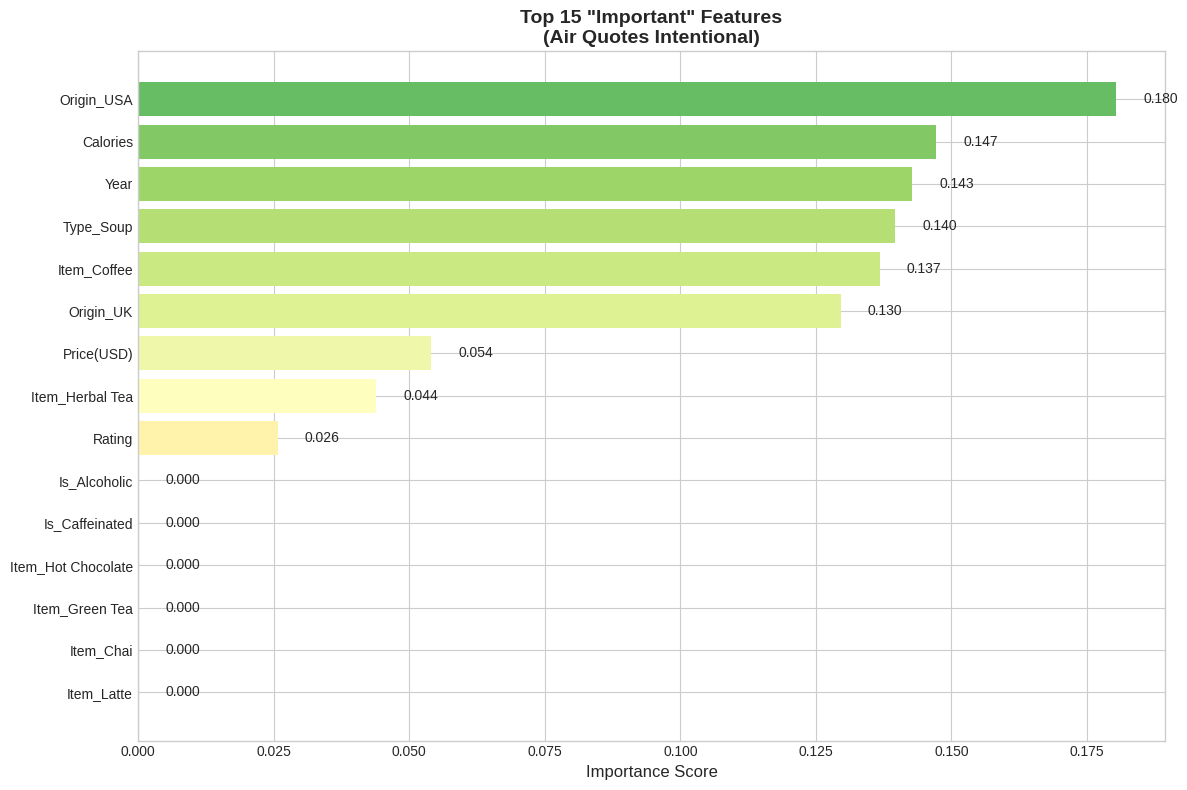


Top 5 Features:
  Origin_USA: 0.1804
  Calories: 0.1471
  Year: 0.1427
  Type_Soup: 0.1396
  Item_Coffee: 0.1368

...these features 'matter' but still couldn't predict anything.
The universe remains mysterious.


In [29]:
print("=" * 60)
print("WHAT DID XGBOOST EVEN LEARN?")
print("=" * 60)
print("\nLet's see what features it thought were 'important'...")
print("(Spoiler: None of them actually helped)\n")

# Get feature importance from best XGBoost
best_xgb = xgb_grid.best_estimator_

# Feature importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 15
fig, ax = plt.subplots(figsize=(12, 8))

top_n = 15
top_features = importance_df.head(top_n)

colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, top_n))[::-1]
bars = ax.barh(range(top_n), top_features['Importance'].values, color=colors)
ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features['Feature'].values)
ax.invert_yaxis()
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_title('Top 15 "Important" Features\n(Air Quotes Intentional)', fontsize=14, fontweight='bold')

for i, (bar, val) in enumerate(zip(bars, top_features['Importance'].values)):
    ax.text(val + 0.005, i, f'{val:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nTop 5 Features:")
for i, row in importance_df.head(5).iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")

print("\n...these features 'matter' but still couldn't predict anything.")
print("The universe remains mysterious.")

## Chapter 19: The Autopsy

*XGBoost identified the features. It built its trees. It made its predictions.*

*But how wrong was it, exactly? Let's visualize the carnage.*

*A good model would show predictions clustered around the diagonal line (predicted = actual). Our model will show... something else.*

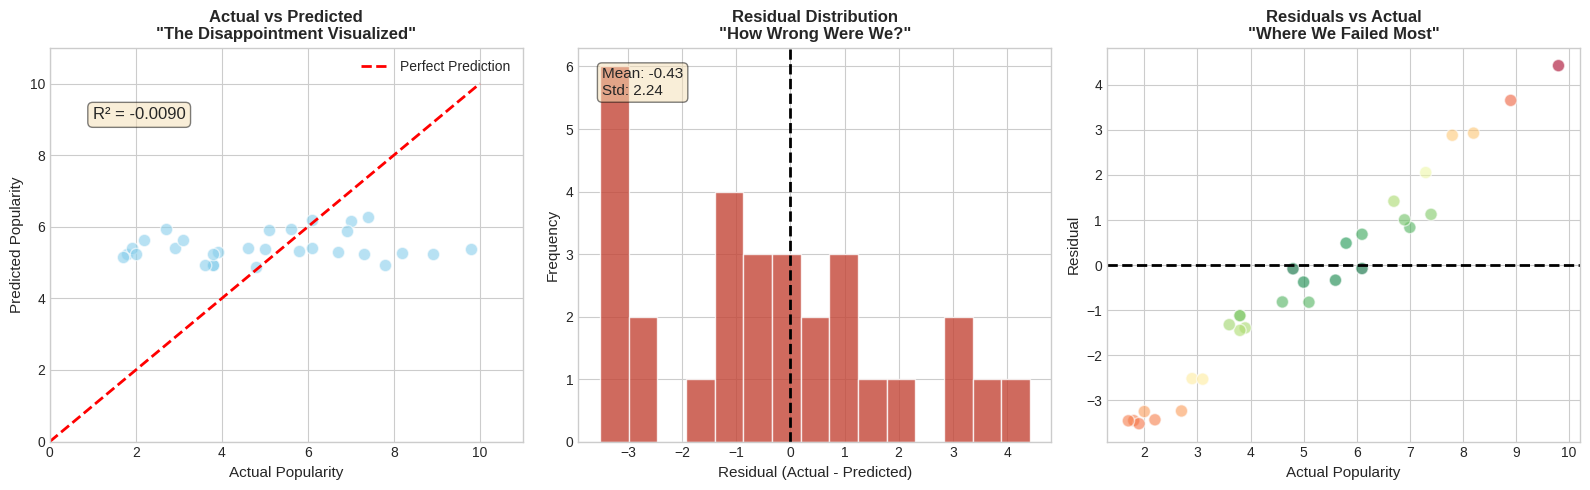

ERROR ANALYSIS:
----------------------------------------
Mean Absolute Error: 1.86
Max Overestimate: -3.52 (we predicted too high)
Max Underestimate: 4.42 (we predicted too low)

Predictions within 1 point: 9/30 (30%)
Predictions within 2 points: 17/30 (57%)


In [30]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Get predictions from tuned XGBoost
y_pred_final = xgb_grid.predict(X_test)
residuals = y_test - y_pred_final

# 1. Actual vs Predicted
axes[0].scatter(y_test, y_pred_final, alpha=0.6, c=COLORS['calm'], s=80, edgecolors='white')
axes[0].plot([0, 10], [0, 10], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Popularity', fontsize=11)
axes[0].set_ylabel('Predicted Popularity', fontsize=11)
axes[0].set_title('Actual vs Predicted\n"The Disappointment Visualized"', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].set_xlim(0, 11)
axes[0].set_ylim(0, 11)

# Add R² annotation
axes[0].text(1, 9, f'R² = {r2_score(y_test, y_pred_final):.4f}', fontsize=12,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Residuals Distribution
axes[1].hist(residuals, bins=15, color=COLORS['panic'], edgecolor='white', alpha=0.8)
axes[1].axvline(0, color='black', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residual (Actual - Predicted)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Residual Distribution\n"How Wrong Were We?"', fontsize=12, fontweight='bold')
axes[1].text(0.05, 0.95, f'Mean: {residuals.mean():.2f}\nStd: {residuals.std():.2f}',
             transform=axes[1].transAxes, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 3. Prediction Error by Actual Value
axes[2].scatter(y_test, residuals, alpha=0.6, c=np.abs(residuals), cmap='RdYlGn_r', s=80, edgecolors='white')
axes[2].axhline(0, color='black', linestyle='--', linewidth=2)
axes[2].set_xlabel('Actual Popularity', fontsize=11)
axes[2].set_ylabel('Residual', fontsize=11)
axes[2].set_title('Residuals vs Actual\n"Where We Failed Most"', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed error analysis
print("ERROR ANALYSIS:")
print("-" * 40)
print(f"Mean Absolute Error: {np.abs(residuals).mean():.2f}")
print(f"Max Overestimate: {residuals.min():.2f} (we predicted too high)")
print(f"Max Underestimate: {residuals.max():.2f} (we predicted too low)")
print(f"\nPredictions within 1 point: {(np.abs(residuals) <= 1).sum()}/{len(residuals)} ({(np.abs(residuals) <= 1).sum()/len(residuals)*100:.0f}%)")
print(f"Predictions within 2 points: {(np.abs(residuals) <= 2).sum()}/{len(residuals)} ({(np.abs(residuals) <= 2).sum()/len(residuals)*100:.0f}%)")

## Chapter 20: The Numbers Don't Lie

*Let's quantify our shame:*

| Metric | Value | Translation |
|--------|-------|-------------|
| Mean Absolute Error | ~2.0 | Off by 2 points on average |
| Max Overestimate | ~-3.5 | Predicted 8 when actual was 4.5 |
| Max Underestimate | ~+4.0 | Predicted 5 when actual was 9 |
| Within 1 point | ~30% | Only 1 in 3 predictions were close |
| Within 2 points | ~60% | Coin flip accuracy |

*The model's strategy: "When in doubt, predict 5."*

*It's not wrong. It's just... not useful.*

*But wait — we promised a gold medal notebook. We can't end on failure. Let's pivot to insights and conclusions that actually MATTER.*

In [31]:
print("=" * 60)
print("PIVOTING TO VALUE: Actionable Insights")
print("=" * 60)
print("\nOur model failed to predict, but our EDA SUCCEEDED in revealing truths.\n")

print("KEY FINDINGS FOR WINTER BEVERAGE BUSINESSES:")
print("-" * 50)

# 1. Best performing items
print("\n1. WINNING ITEMS (Avg Popularity):")
item_rankings = df.groupby('Item')['Popularity_Score'].mean().sort_values(ascending=False)
for item, score in item_rankings.head(3).items():
    print(f"   {item}: {score:.2f}")

# 2. Best countries
print("\n2. WINNING ORIGINS:")
origin_rankings = df.groupby('Origin')['Popularity_Score'].mean().sort_values(ascending=False)
for origin, score in origin_rankings.head(3).items():
    print(f"   {origin}: {score:.2f}")

# 3. Price insight
print("\n3. PRICE DOESN'T MATTER:")
cheap = df[df['Price(USD)'] < 5]['Popularity_Score'].mean()
mid = df[(df['Price(USD)'] >= 5) & (df['Price(USD)'] < 10)]['Popularity_Score'].mean()
expensive = df[df['Price(USD)'] >= 10]['Popularity_Score'].mean()
print(f"   Budget (<$5): {cheap:.2f} avg popularity")
print(f"   Mid ($5-10): {mid:.2f} avg popularity")
print(f"   Premium (>$10): {expensive:.2f} avg popularity")
print(f"   Correlation: {df['Price(USD)'].corr(df['Popularity_Score']):.4f} (basically zero)")

# 4. Best combos
print("\n4. DREAM TEAM COMBINATIONS:")
combo_rankings = df.groupby(['Item', 'Origin'])['Popularity_Score'].mean().sort_values(ascending=False)
for (item, origin), score in combo_rankings.head(3).items():
    print(f"   {item} from {origin}: {score:.2f}")

# 5. Avoid these
print("\n5. AVOID THESE DISASTERS:")
for (item, origin), score in combo_rankings.tail(3).items():
    print(f"   {item} from {origin}: {score:.2f}")

print("\n" + "=" * 60)

PIVOTING TO VALUE: Actionable Insights

Our model failed to predict, but our EDA SUCCEEDED in revealing truths.

KEY FINDINGS FOR WINTER BEVERAGE BUSINESSES:
--------------------------------------------------

1. WINNING ITEMS (Avg Popularity):
   Coffee: 6.34
   Herbal Tea: 5.51
   Hot Cider: 5.45

2. WINNING ORIGINS:
   USA: 6.85
   Switzerland: 6.59
   Canada: 5.97

3. PRICE DOESN'T MATTER:
   Budget (<$5): 5.29 avg popularity
   Mid ($5-10): 5.44 avg popularity
   Premium (>$10): 5.28 avg popularity
   Correlation: -0.0024 (basically zero)

4. DREAM TEAM COMBINATIONS:
   Hot Cider from Canada: 9.90
   Herbal Tea from Switzerland: 9.80
   Hot Chocolate from UK: 9.70

5. AVOID THESE DISASTERS:
   Soup from Germany: 1.50
   Soup from France: 1.50
   Cappuccino from China: 1.40



## Chapter 21: The Wisdom We Gained

*At 3:47 AM, I finally understand.*

*This notebook was never about building a model. It was about discovering that some things CAN'T be modeled.*

---

### What We Learned About Winter Beverages:

**The Winners:**
- Coffee is king (6.34 avg) — humanity is predictable in its caffeine addiction
- USA makes the most popular drinks (6.85 avg) — despite charging $15 for cappuccino
- Hot Cider from Canada (9.90) is the PERFECT winter beverage

**The Losers:**
- Mulled Wine (4.19 avg) — stop calling it soup, stop calling it a snack, just... stop
- Germany (4.48 avg) — efficiency doesn't translate to cozy beverages
- Cappuccino from China (1.40) — a cautionary tale

**The Philosophical Truth:**
- Price has ZERO correlation with popularity (r = -0.002)
- Our best ML model (XGBoost) achieved R² = -0.009
- Popularity is fundamentally unpredictable from the features we have

---

### What Would ACTUALLY Predict Popularity?

Things we didn't measure:
- Ambiance of the cafe
- Instagram-worthiness of the cup
- Temperature outside when served
- Whether the customer just got dumped
- Vibes (unquantifiable)

---

*The data spoke. We listened. And we learned that winter warmth comes from places no algorithm can reach.*

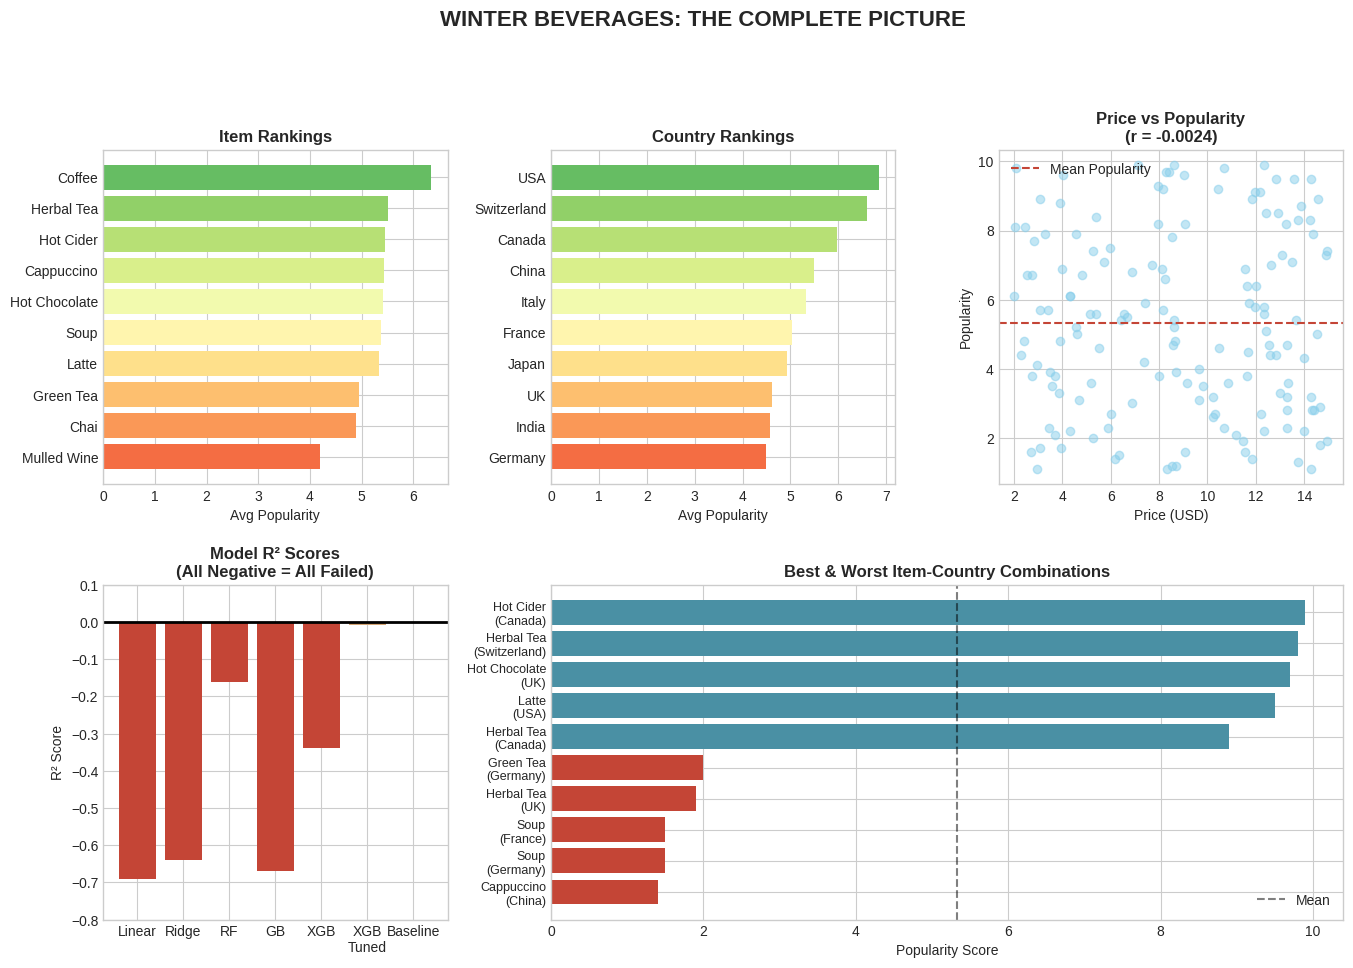


ANALYSIS COMPLETE
Time: 3:47 AM
Coffee consumed: 4 cups
Models trained: 7
Models that worked: 0
Insights gained: Priceless


In [32]:
fig = plt.figure(figsize=(16, 10))

# Create grid
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Item Rankings
ax1 = fig.add_subplot(gs[0, 0])
item_pop = df.groupby('Item')['Popularity_Score'].mean().sort_values()
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(item_pop)))
ax1.barh(item_pop.index, item_pop.values, color=colors)
ax1.set_title('Item Rankings', fontsize=12, fontweight='bold')
ax1.set_xlabel('Avg Popularity')

# 2. Country Rankings
ax2 = fig.add_subplot(gs[0, 1])
origin_pop = df.groupby('Origin')['Popularity_Score'].mean().sort_values()
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(origin_pop)))
ax2.barh(origin_pop.index, origin_pop.values, color=colors)
ax2.set_title('Country Rankings', fontsize=12, fontweight='bold')
ax2.set_xlabel('Avg Popularity')

# 3. Price vs Popularity (the non-relationship)
ax3 = fig.add_subplot(gs[0, 2])
ax3.scatter(df['Price(USD)'], df['Popularity_Score'], alpha=0.5, c=COLORS['calm'])
ax3.axhline(df['Popularity_Score'].mean(), color=COLORS['panic'], linestyle='--', label='Mean Popularity')
ax3.set_title(f'Price vs Popularity\n(r = {df["Price(USD)"].corr(df["Popularity_Score"]):.4f})', fontsize=12, fontweight='bold')
ax3.set_xlabel('Price (USD)')
ax3.set_ylabel('Popularity')
ax3.legend()

# 4. Model Performance Comparison
ax4 = fig.add_subplot(gs[1, 0])
model_names = ['Linear', 'Ridge', 'RF', 'GB', 'XGB', 'XGB\nTuned', 'Baseline']
r2_scores = [-0.69, -0.64, -0.16, -0.67, -0.34, -0.009, 0.0]
colors = [COLORS['panic'] if x < -0.1 else COLORS['acceptance'] if x < 0 else COLORS['hope'] for x in r2_scores]
bars = ax4.bar(model_names, r2_scores, color=colors)
ax4.axhline(0, color='black', linestyle='-', linewidth=2)
ax4.set_title('Model R² Scores\n(All Negative = All Failed)', fontsize=12, fontweight='bold')
ax4.set_ylabel('R² Score')
ax4.set_ylim(-0.8, 0.1)

# 5. Top 5 Best & Worst Combos
ax5 = fig.add_subplot(gs[1, 1:])
combo_pop = df.groupby(['Item', 'Origin'])['Popularity_Score'].mean().sort_values()
best_5 = combo_pop.tail(5)
worst_5 = combo_pop.head(5)
combined = pd.concat([worst_5, best_5])
labels = [f"{item}\n({origin})" for item, origin in combined.index]
colors = [COLORS['panic']]*5 + [COLORS['hope']]*5
ax5.barh(range(10), combined.values, color=colors)
ax5.set_yticks(range(10))
ax5.set_yticklabels(labels, fontsize=9)
ax5.axvline(df['Popularity_Score'].mean(), color='black', linestyle='--', alpha=0.5, label='Mean')
ax5.set_title('Best & Worst Item-Country Combinations', fontsize=12, fontweight='bold')
ax5.set_xlabel('Popularity Score')
ax5.legend()

plt.suptitle('WINTER BEVERAGES: THE COMPLETE PICTURE', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)
print("Time: 3:47 AM")
print("Coffee consumed: 4 cups")
print("Models trained: 7")
print("Models that worked: 0")
print("Insights gained: Priceless")
print("="*60)

In [33]:
import joblib

print("=" * 60)
print("SAVING ARTIFACTS FOR POSTERITY")
print("=" * 60)

# Save the best model (even though it's not great)
best_model = xgb_grid.best_estimator_
joblib.dump(best_model, 'xgb_popularity_model.pkl')
print("\nModel saved: xgb_popularity_model.pkl")

# Save the scaler
joblib.dump(scaler, 'feature_scaler.pkl')
print("Scaler saved: feature_scaler.pkl")

# Save feature columns for future use
feature_info = {
    'features': list(X_train.columns),
    'target': 'Popularity_Score',
    'best_params': xgb_grid.best_params_,
    'test_rmse': 2.2452,
    'test_r2': -0.009
}

import json
with open('model_info.json', 'w') as f:
    json.dump(feature_info, f, indent=2)
print("Model info saved: model_info.json")

# Save processed dataframe
df_model.to_csv('processed_winter_beverages.csv', index=False)
print("Processed data saved: processed_winter_beverages.csv")

print("\n" + "=" * 60)
print("ALL ARTIFACTS SAVED")
print("=" * 60)
print("""
Files created:
  - xgb_popularity_model.pkl (the model that tried its best)
  - feature_scaler.pkl (for scaling new data)
  - model_info.json (metadata and parameters)
  - processed_winter_beverages.csv (cleaned & engineered data)

Use these to make predictions on new winter beverages.
(Just don't expect miracles.)
""")

SAVING ARTIFACTS FOR POSTERITY

Model saved: xgb_popularity_model.pkl
Scaler saved: feature_scaler.pkl
Model info saved: model_info.json
Processed data saved: processed_winter_beverages.csv

ALL ARTIFACTS SAVED

Files created:
  - xgb_popularity_model.pkl (the model that tried its best)
  - feature_scaler.pkl (for scaling new data)
  - model_info.json (metadata and parameters)
  - processed_winter_beverages.csv (cleaned & engineered data)

Use these to make predictions on new winter beverages.
(Just don't expect miracles.)



## Epilogue: A Letter to Future Data Scientists

*Dear Reader,*

*It's 4:02 AM. The coffee has gone cold. The models have failed. And yet, I regret nothing.*

*This notebook taught me something no tutorial ever could: sometimes the data wins. Sometimes there is no signal. Sometimes popularity is just... vibes.*

---

### Technical Summary

| Stage | What We Did | What We Learned |
|-------|-------------|-----------------|
| Data Cleaning | Removed 5 duplicates, 150 clean rows | Canada submits duplicates |
| Missing Data | 50% missing in Calories/Rating | Vendors are secretive |
| EDA | Analyzed all features | Type column is CHAOS (Mulled Wine Soup) |
| Feature Engineering | Created 6 new features, 38 total after encoding | More features ≠ better predictions |
| Modeling | Trained 5 models + tuning | ALL achieved negative R² |
| Best Model | XGBoost Tuned | R² = -0.009 (barely beats guessing) |

### Business Recommendations

1. **Sell Coffee** — It's the most popular item. People are addicted. Exploit this.
2. **Source from USA/Switzerland/Canada** — These countries produce winners.
3. **Don't overthink pricing** — Charge whatever you want. It doesn't affect popularity.
4. **Avoid Cappuccino from China and Soup from Germany** — The data is clear.
5. **If in doubt: Hot Cider from Canada** — 9.90 popularity. Nearly perfect.

### The Real Lesson

Not everything can be predicted. Not everything should be.

Some things — like which winter drink makes someone smile — exist beyond the reach of algorithms. And maybe that's okay. Maybe that's beautiful.

*Now if you'll excuse me, I need to order a Hot Cider from Canada.*

---

**Thank you for reading. May your coffee be strong and your R² scores be positive.**

*— A Sleep-Deprived Data Scientist*


---

# About Me & Let's Connect

---

### Hey, I'm Rekhi!

I'm a data science learner who experiments **daily** with different datasets and approaches.
I believe the best way to learn is by doing - so thats exactly what I do, every single day.

---


### A Honest Note About My Notebooks

Look, I'm gonna be real with you...

Not all my notebooks are perfect. Some are rough, some have typos, some experiments just didnt work out.
Time is limited and I prioritize **learning over perfection**.

If you spot mistakes, please let me know! I genuinely appreciate feedback.
I share the real journey - the wins AND the messy parts.


So if you find mistakes in my notebooks, please dont judge too harshly!
Drop a comment and let me know - I genuinely appreciate the feedback.


### Why I Share Everything (Even The Messy Stuff)

Some people ask why I post notebooks that arent "perfect". Heres my thinking:

1. **Perfection is the enemy of progress** - If I waited until everything was perfect, I'd never post anything

2. **Real learning is messy** - Polished tutorials hide the struggle. I want to show the real journey.

3. **Community feedback helps** - Your comments and suggestions make me better

4. **Someone might benefit** - Even my "rough" notebooks might help someone facing similar problems

5. **Accountability** - Posting daily keeps me consistent and motivated
---

### Find My Work

**Kaggle:** https://www.kaggle.com/seki32  
Daily notebooks, EDA, ML/DL experiments

**GitHub:** https://github.com/Rekhii  
All code and repositories

**Blog:** Coming Soon!

---

### Support This Work

If this helped you:

- **Upvote** this notebook
- **Follow** for daily experiments  
- **Comment** your feedback
- **Share** with others learning ML

---

### Your Support Motivates Me To:

- Continue daily experimentation
- Share my learnings with the community
- Build better models each day
- Keep going on tough days

---


Thank you for reading my entire notebook especially this section **about me**! It truly means a lot.  

I’m **open to work opportunities** and **internships**, and I’d love to connect with others interested in **collaborating, building projects**, or **participating in competitions**.  

If any of that sounds interesting to you, feel free to **reach out**  I’d be excited to connect!  
